#過去十年の競馬結果のデータ

In [6]:
import os
import pandas as pd
%cd C:\Users\nohoho1009\PycharmProjects\UMA

feature = pd.read_csv("data/feature.csv", encoding="Shift-JIS")
race_info = pd.read_csv("data/race_info.csv", encoding="Shift-JIS")
race_result = pd.read_csv("data/race_result.csv", encoding="Shift-JIS")

C:\Users\nohoho1009\PycharmProjects\UMA


C:\Users\nohoho1009\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 人気順の的中率
オッズの人気順にそのまま単勝で購入した場合の的中率は以下の通り。
人気1位の単勝購入で約3割、5番手まで含めると大体8割くらいの的中率となるらしい。

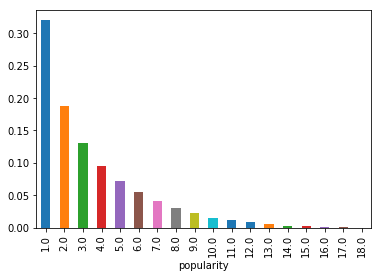

In [12]:
result_1st = race_result[race_result.order_of_finish == "1"]
polularity = result_1st.groupby("popularity").race_id.count()
polularity = polularity / polularity.sum()

polularity.plot.bar()

In [16]:
polularity.iloc[0] + polularity.iloc[1] + polularity.iloc[2] + polularity.iloc[3] \
+ polularity.iloc[4]

0.8057920648711266

## 人気別の払い戻し率
馬の人気別の払い戻し率は下記の通り。
4,5,6,7番人気の払い戻し率が高い模様。

払い戻し率は対象の馬を購入した場合に帰ってくる金額の割合のこと。
1を超えれば利益が出る。

In [19]:
race_result["cnt"] = 1
buyTime = race_result.groupby("popularity").cnt.count()

result_1st = race_result[race_result.order_of_finish == "1"]
payback = result_1st.groupby("popularity").agg({"odds" : "sum"})
payback["buyCnt"] = buyTime

display(payback.odds / payback.buyCnt)

popularity
1.0     0.772661
2.0     0.793729
3.0     0.802116
4.0     0.813358
5.0     0.824397
6.0     0.828100
7.0     0.816323
8.0     0.817442
9.0     0.737026
10.0    0.721138
11.0    0.739011
12.0    0.659824
13.0    0.622710
14.0    0.473708
15.0    0.521498
16.0    0.379869
17.0    0.257288
18.0    0.191260
dtype: float64